## State understanding and feedback (audio)

In [1]:

import matplotlib
%matplotlib inline

from pcml.demos import audio_cues


W1120 18:31:08.400048 140506727466816 deprecation_wrapper.py:119] From /opt/conda/lib/python3.6/site-packages/tensor2tensor/utils/expert_utils.py:68: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1120 18:31:09.431903 140506727466816 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1120 18:31:11.216518 140506727466816 deprecation_wrapper.py:119] From /opt/conda/lib/python3.6/site-packages/tensor2tensor/utils/adafactor.py:27: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1120 18:31:11.219000 140506727466816 deprecation_wrapper.py:119] From /opt/conda/lib/python3.6/s

In [ ]:
audio_cues.optimize()

I1119 18:53:56.656633 140396377835328 t2t_model.py:2248] Setting T2TModel mode to 'predict'
I1119 18:53:56.660636 140396377835328 t2t_model.py:2248] Setting hparams.dropout to 0.0
I1119 18:53:56.662279 140396377835328 t2t_model.py:2248] Setting hparams.label_smoothing to 0.0
I1119 18:53:56.663497 140396377835328 t2t_model.py:2248] Setting hparams.layer_prepostprocess_dropout to 0.0
I1119 18:53:56.664517 140396377835328 t2t_model.py:2248] Setting hparams.symbol_dropout to 0.0
I1119 18:53:56.665664 140396377835328 t2t_model.py:2248] Setting hparams.attention_dropout to 0.0
I1119 18:53:56.666660 140396377835328 t2t_model.py:2248] Setting hparams.relu_dropout to 0.0
W1119 18:53:56.682984 140396377835328 deprecation_wrapper.py:119] From /opt/conda/lib/python3.6/site-packages/tensor2tensor/utils/t2t_model.py:244: The name tf.summary.text is deprecated. Please use tf.compat.v1.summary.text instead.

/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your applicati

Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
W1119 18:53:58.825502 140396377835328 deprecation.py:323] From /home/jovyan/work/pcml/pcml/datasets/image_aug.py:36: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W1119 18:53:58.832246 140396377835328 deprecation_wrapper.py:119] From /home/jovyan/work/pcml/pcml/datasets/image_aug.py:203: The name tf.image.resize_bicubic is deprecated. Please use tf.compat.v1.image.resize_

Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

4.5067205


nan


/home/jovyan/work/pcml/pcml/demos/audio_cues.py:356: RuntimeWarning: invalid value encountered in float_scalars
  synth_level = synth_min + synth_range*((dist-mn)/(mx-mn))


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


1.640194
200.0


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.1387565
269.570255279541


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.3576357
300.11303424835205


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.5305297
324.23895597457886


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.3992157
305.9151768684387


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

4.334941
576.0295867919922


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

4.1857295
555.2083730697632


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

4.006309
530.1717281341553


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.0185068
252.7903974056244


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.1913357
200.0
Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.979088
295.0420320034027


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.9961905
297.10545539855957


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.0795498
307.1627140045166


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.7230778
264.15449380874634


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.6398277
254.11040782928467


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.7737777
390.9210681915283


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.6804156
379.6569585800171


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.7673726
390.1482939720154


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.5615003
365.3098702430725


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.7925228
272.5330114364624


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

3.4196541
468.8458204269409


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.9049497
406.7469120025635


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.4313402
228.9564609527588


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.0501921
200.0
Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.7839421
284.91178154945374


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.4889423
250.7735013961792


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

4.250969
570.4036474227905


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.162581
328.72902154922485


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.2210661
219.7740599513054
Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.6062546
264.349240064621


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

2.2032945
333.4405183792114


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

1.8640704
294.18447613716125


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

In [5]:

import json
import tempfile
import cv2
import time

from google.cloud import firestore
from PIL import Image
import io
import base64

import random

from gtts import gTTS

import numpy as np
from sklearn.neighbors import KDTree

import tensorflow as tf
tfe = tf.contrib.eager
tfe.enable_eager_execution()
Modes = tf.estimator.ModeKeys  # pylint: disable=invalid-name

from faced import FaceDetector

from tensor2tensor.utils import registry

from pcml.utils.dev_utils import T2TDevHelper
from pcml.datasets.fec import _normalize_dimensions
from pcml.datasets.fec import _read_image
import pcml

from pcml.datasets import image_aug

from IPython.display import (
    Audio, display, clear_output)
from functools import partial
from matplotlib import pyplot as plt
from matplotlib import pylab
import matplotlib
%matplotlib inline


def load_image(img_string):
  binary = base64.b64decode(img_string.split(',')[1])
  filename = "/tmp/stream.jpeg"
  with open(filename, 'wb') as f:
    f.write(binary)
  img = Image.open(filename)
  return np.array(img)

def synth(f):
    x = np.sin(f * 2. * np.pi * t)
    display(Audio(x, rate=rate, autoplay=True))


def _random_crop_square(image):

  x,y,c = image.shape

  x_crop_before = 0
  x_crop_after = 0
  y_crop_before = 0
  y_crop_after = 0

  if x > y:
    x_crop = x - y
    x_crop_before = np.random.randint(0, x_crop)
    x_crop_after = x_crop - x_crop_before
  elif y > x:
    y_crop = y - x
    y_crop_before = np.random.randint(0, y_crop)
    y_crop_after = y_crop - y_crop_before

  x_start = x_crop_before
  x_end = x - x_crop_after
  y_start = y_crop_before
  y_end = y - y_crop_after

  return image[x_start:x_end, y_start:y_end, :]


def _normalize_dimensions(image, target_shape):

  image = _random_crop_square(image)

  mn, mx = np.amin(image), np.amax(image)
  if mn >=0 and mx <= 255:
    image = image / 255.0

  source_shape = image.shape
  scale_x_factor = target_shape[0]/source_shape[0]
  scale_y_factor = target_shape[1]/source_shape[1]
  scale_x_first = (scale_x_factor <= scale_y_factor)

  if scale_x_first:

    new_x = target_shape[0]
    new_y = int(source_shape[1]*scale_x_factor)
    resize_dim = (new_x, new_y)
    newimg = cv2.resize(image, resize_dim)
    pad_width = target_shape[1] - new_y
    if pad_width > 0:
      # Pad in Y direction
      newimg = np.pad(newimg, [(0,pad_width),(0,0),(0,0)], mode="mean")

  else:

    new_y = target_shape[1]
    new_x = int(source_shape[0]*scale_y_factor)
    resize_dim = (new_x, new_y)
    newimg = cv2.resize(image, resize_dim)
    pad_width = target_shape[0] - new_x
    if pad_width > 0:
      # Pad in X direction
      newimg = np.pad(newimg, [(0,0),(0,pad_width),(0,0)], mode="mean")

  newimg = (newimg*255.0).astype(np.int64)

  return newimg


def detect_and_preprocess(image):

  detector = FaceDetector()
  detect_threshold = 0.5
  predictions = detector.predict(image, detect_threshold)

  xcenter = predictions[0][0]
  ycenter = predictions[0][1]
  width = predictions[0][2]*1.80
  height = predictions[0][3]*1.80

  xmax = image.shape[1]
  ymax = image.shape[0]

  ystart = max(0,int(ycenter-height/2))
  yend = min(ymax,int(ycenter+height/2))
  xstart = max(0,int(xcenter-width/2))
  xend = min(xmax,int(xcenter+width/2))

  img_with_face = image[ystart:yend,xstart:xend,:]

  image_shape = (64,64,3)
  img_post = _normalize_dimensions(img_with_face, target_shape=image_shape)

  return img_post


def get_example():

  # Add a new document
  db = firestore.Client()
  doc_ref = db.collection(u'users/2LbhP63ADQfo5XkmKeVVEtPWvAD2/modalities').document(u'av')

  image_stats = {"mean": [0.330, 0.537, -0.242], "sd": [0.220, 0.169, 1.156]}
  shape = (64,64,3)
  mode = "eval"

  data = doc_ref.get().to_dict()["videoData"]

  img = np.asarray(load_image(data))
  
  img = detect_and_preprocess(img)

  # Convert to int32

  example = {
    "image/a": img,
    "image/b": img,
    "image/c": img,
    "image/a/noaug": img,
    "image/b/noaug": img,
    "image/c/noaug": img,
    "triplet_code": [0],
    "type": [1],
    "targets": img
  }

  def _preproc(image):

    image = image_aug.preprocess_image(
      image, mode,
      resize_size=shape,
      normalize=True,
      image_statistics=image_stats,
      crop_area_min=1,
      contrast_lower=0.45,
      contrast_upper=0.55,
      brightness_delta_min=-0.01,
      brightness_delta_max=0.01)

    image.set_shape(shape)

    return image

  example["image/a"] = tf.expand_dims(_preproc(example["image/a"]),0)
  example["image/b"] = tf.expand_dims(_preproc(example["image/b"]),0)
  example["image/c"] = tf.expand_dims(_preproc(example["image/c"]),0)
  example["triplet_code"] = tf.expand_dims(tf.cast(example["triplet_code"], tf.int64),0)

  return example


In [6]:

detector = FaceDetector()
detect_threshold = 0.7

local_path = "/home/jovyan/photo.jpg"
tmp_dir="/tmp/dev"
image_shape=(64,64,3)

mode = "eval"
batch_size = 100
num_batches = 100

problem_name = "ext_dev2"
model_name = "percep_similarity_triplet_emb"
hparams_set_name = "percep_similarity_triplet_emb"

ckpt_dir = "gs://clarify-public/models/fec-train-j1030-0136-3a8f/output"
data_dir = "gs://clarify-models-us-central1/data/fec"

temp = tempfile.mkdtemp()

problem_name = "facial_expression_correspondence"
model_name = "percep_similarity_triplet_emb"
hparams_set_name = "percep_similarity_triplet_emb"
mode = "predict"
ckpt_dir = "gs://clarify-"
#ckpt_dir = "gs://clarify-models-us-central1/experiments/fec/dev/fec-train-j1030-0136-3a8f/output"
data_dir = "gs://clarify-models-us-central1/data/fec"

hparams = registry.hparams(hparams_set_name)
hparams.data_dir = data_dir

problem_obj = registry.problem(problem_name)

p_hparams = problem_obj.get_hparams(hparams)

model_obj = registry.model(model_name)

rate = 16000.
duration = .25
t = np.linspace(
    0., duration, int(rate * duration))


In [ ]:

from pcml.demos import audio_cues
v = audio_cues.optimize_human()


In [7]:

def _goal_from_goals(goals):
  return goals[0]


def _tts(msg):
  filename = "/tmp/clarify-tmp.mp3"
  tts = gTTS(msg)
  tts.save(filename)
  display(Audio(filename, autoplay=True))


def play_instructions():
  message = "Goal definition will begin in twenty seconds following a tone and will "
  message += "last for ten seconds. Please assume a mental state that you want to "
  message += "be your goal. The definition period will begin in seven seconds."
  _tts(message)
  time.sleep(20)
  synth(600)


def play_beginning_session():
  _tts("Goal definition complete. Beginning session.")
  time.sleep(3)


def play_establishing_baseline():
  _tts("Establishing baseline. Please demonstrate a variety of expressions and poses.")
  time.sleep(3)


def play_baseline_complete():
  _tts("Finished establishing baseline.")
  time.sleep(3)


def optimize_human():

  play_instructions()

  query_data = {}

  synth_min = 200
  synth_max = 600
  synth_range = synth_max - synth_min

  mn = None
  mx = None

  goals = []
  goal = None

  distance_threshold = 1.3

  num_sampled = 0

  baseline = True

  distances = []
  examples = []
  num_baseline_steps = 0

  with tfe.restore_variables_on_create(tf.train.latest_checkpoint(ckpt_dir)):

    model = model_obj(hparams, mode, p_hparams)

    while True:

      print("Doing step...")

      try:

        example = get_example()
        current, _ = model(example)

        num_sampled += 1

        if num_sampled <= 3:

          goals.append(current)
          distances.append(0)
          examples.append(example)

        else:

          if goal is None:
            goal = _goal_from_goals(goals)
            play_beginning_session()

          dist = np.linalg.norm(current - goal)
          print(dist)

          distances.append(dist)
          examples.append(example)

          if not mn:
            mn = dist
          if not mx:
            mx = dist

          if dist < mn:
            mn = dist

          if dist > mx:
            mx = dist

          if num_sampled == 4:
            play_establishing_baseline()

          synth_level = synth_min + synth_range*((dist-mn)/(mx-mn))

          #if distances:
          #  distance_threshold = np.mean(distances)

          print(synth_level)
          if dist > distance_threshold:
            synth(synth_level)

          if num_sampled == 20:
            play_baseline_complete()
            baseline = False
            num_baseline_steps = num_sampled

      except (KeyboardInterrupt, SystemExit):
        break

      except:
        raise
        print("there was an exception but we're not worried ;D")

  return locals()


In [4]:
"""

- Intermittent tones are distracting
- High pitched tones when going out of goal state feels like negative reinforcement
  - Should instead be positive reinforcement that's only present when in goal state
- Should smooth through time because we're interested in extended states for now not momentary variation

- The delay kind of gets in the way.
- It's helpful to set a more extreme goal like very very happy.

- Being able to give a push update of an exercise you should try in this moment or of something you meant to do at this
  time of day

- I'm noticing it's hard to get myself into the state I would like to be my goal and that in trying to get there doubt
  and perfectionism etc. get in the way - that goal definition might be better passively while doing something else as
  well as following a meditaiton sessions.
- 

"""

"\n\n- Intermittent tones are distracting\n- High pitched tones when going out of goal state feels like negative reinforcement\n  - Should instead be positive reinforcement that's only present when in goal state\n- Should smooth through time because we're interested in extended states for now not momentary variation\n\n- The delay kind of gets in the way.\n- It's helpful to set a more extreme goal like very very happy.\n\n- Being able to give a push update of an exercise you should try in this moment or of something you meant to do at this\n  time of day\n\n- I'm noticing it's hard to get myself into the state I would like to be my goal and that in trying to get there doubt\n  and perfectionism etc. get in the way - that goal definition might be better passively while doing something else as\n  well as following a meditaiton sessions.\n- \n\n"

In [5]:
Can take minimum distance to boundary of a set of expressions

SyntaxError: invalid syntax (<ipython-input-5-2bd6a1b6f2ca>, line 1)

In [8]:

v = optimize_human()


Doing step...


/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnin

NotFoundError: percep_similarity_triplet_emb_1/body/video/conv2d/kernel not found in checkpoint

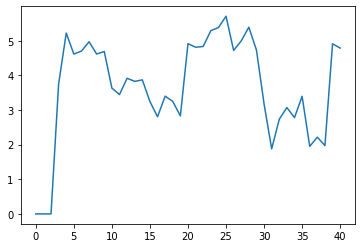

In [5]:
plt.plot(v["distances"])

In [12]:

def plot_filmstrip(examples, distances):

  from matplotlib import pyplot as plt
  num_col = 1

  plt.figure()
  f, axarr = plt.subplots(len(examples), num_col,
                          figsize=(2*num_col,1.5*len(examples)),
                          dpi=150)

  for i, example in enumerate(examples):

    img_noaug = tf.squeeze(example["image/a/noaug"]).numpy()
    img_aug = tf.squeeze(example["image/a"]).numpy().astype(np.int32)

    d = int(distances[i]*1000)/1000.0
    axarr[i].imshow(img_noaug)
    axarr[i].set_title("d={}".format(str(d)))
    axarr[i].axis('off')


<Figure size 432x288 with 0 Axes>

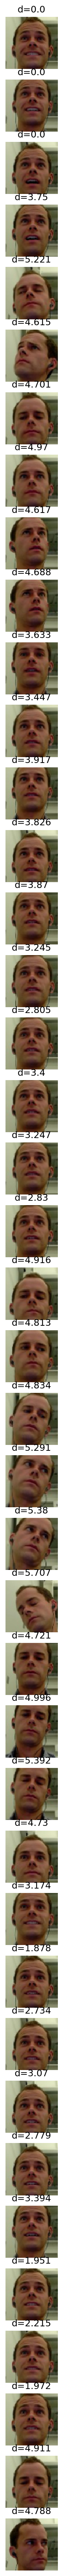

In [13]:
plot_filmstrip(v["examples"], v["distances"])

In [ ]:

"""

Matching game - how quickly can you match the emotion exhibited in a presented image.


This would all be a lot easier with continuous-streaming camera images and beefy local inference if not
at least inference via a GPU-enabled TFServing instance.

"""
